# 1. Update the data source
The data source is a repository by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE): [Johns Hopkins Github repository](https://github.com/CSSEGISandData/COVID-19).

We want to make the pull in the easiest and fastest possible way, so I make the next script for that:

In [3]:
import git
import os

**How to change working directory in python?**

In [40]:
# Get Current Worrking Directory
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19'

# Change directory
os.chdir("Repo COVID19 - Johns Hopkins")
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19\\Repo COVID19 - Johns Hopkins'

# Go to the upper directory
os.chdir('../')
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19'

'C:\\Users\\nieto\\Google Drive\\COVID19'

Update the data sources pulling the [Johns Hopkins repository](https://github.com/CSSEGISandData/COVID-19).

In [436]:
git_local_path = 'C:\\Users\\nieto\\Google Drive\\COVID19\\Repo COVID19 - Johns Hopkins'

git_repo_path = 'https://github.com/CSSEGISandData/COVID-19.git'

g = git.cmd.Git(git_local_path)

g.pull(git_repo_path)

'Updating 1eb3728..02be34e\nFast-forward\n .../csse_covid_19_daily_reports/03-20-2020.csv     | 300 +++++++\n .../time_series_19-covid-Confirmed.csv             | 947 +++++++++++----------\n .../time_series_19-covid-Deaths.csv                | 947 +++++++++++----------\n .../time_series_19-covid-Recovered.csv             | 947 +++++++++++----------\n 4 files changed, 1734 insertions(+), 1407 deletions(-)\n create mode 100644 csse_covid_19_data/csse_covid_19_daily_reports/03-20-2020.csv'

# 2. Consolidate the historic data in one DataFrame
Once we have updated succesfully the Johns Hopkins repo, we need to note that the directory: **'csse_covid_19_data\\csse_covid_19_daily_reports'**, contains daily case reports that are updated everyday around 23:59 (UTC).

This daily reports are separated in different csv files, for each day. We need to consolidate all this data in one historic pandas DataFrame.

In [43]:
import pandas as pd
from glob import glob

In [437]:
# paths
daily_reports_path = "Repo COVID19 - Johns Hopkins\\csse_covid_19_data\\csse_covid_19_daily_reports"

main_path = 'C:\\Users\\nieto\\Google Drive\\COVID19'

In [438]:
# Read all the daily reports in csv files
os.chdir(daily_reports_path)
filenames = glob('*.csv')
dataframes = [pd.read_csv(file) for file in filenames]
os.chdir(main_path)

In [439]:
# Consolidate our data in one DataFrame
df = pd.concat(dataframes,ignore_index=True,sort=True)

# This is only a test to see if all was correct
#df.to_csv('tests\test_df_conso.csv',index=False)

# 3. Know our data

In [152]:
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Columns

In [440]:
df.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN


I will rearrange the columns of the df to be in a more decent way.

In [441]:
cols = df.columns.to_list()
cols = ['Last Update',
        'Country/Region',
        'Province/State',
        'Latitude',
        'Longitude',
        'Confirmed',
        'Deaths',
        'Recovered']
df = df[cols]
df

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
0,1/22/2020 17:00,Mainland China,Anhui,NaN,NaN,1.0,NaN,NaN
1,1/22/2020 17:00,Mainland China,Beijing,NaN,NaN,14.0,NaN,NaN
2,1/22/2020 17:00,Mainland China,Chongqing,NaN,NaN,6.0,NaN,NaN
3,1/22/2020 17:00,Mainland China,Fujian,NaN,NaN,1.0,NaN,NaN
4,1/22/2020 17:00,Mainland China,Gansu,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7308,2020-03-17T18:33:03,Jersey,NaN,49.1900,-2.110,0.0,0.0,0.0
7309,2020-03-17T16:13:14,Puerto Rico,NaN,18.2000,-66.500,0.0,0.0,0.0
7310,2020-03-17T21:33:03,Republic of the Congo,NaN,-1.4400,15.556,0.0,0.0,0.0
7311,2020-03-19T12:13:38,The Bahamas,NaN,24.2500,-76.000,0.0,0.0,0.0


## Last Updated (dates)
**Observation:** Note that the dates in the column **'Last Updated'** have different formats in differents records.

The different formats are:
- m/d/Y hh:mm
- Y/m/dThh:mm
- Y/m/d hh:mm

> You can check this with ``df['Last Updated'].unique()`` just after consolidating the csv's.

So in order to fix this issue we do the following:

In [446]:
dates = df['Last Update']

In [451]:
# First, we take out the 'T' from
# our original dates and store the
# output in a list (test_dates).
test_dates=[]
for date in dates:
    if date.find('T')<0:
        test_dates.append(date.split()[0])
    else:
        test_dates.append(date.split('T')[0])

test_dates = pd.Series(test_dates)
print(len(test_dates))

# Then, we add the zeros at the beginning
# to the correspondant dates, and change the
# year from 20 to 2020 in the needed cases.
test_dates2 = []
for date in test_dates:
    if date.find('/') > (-1):
        date_splited = date.split('/')
        if len(date_splited[2]) == 2:
            test_dates2.append('0'+date_splited[0]+"/"+date_splited[1]+"/2020")
        else:
            test_dates2.append('0'+date)
    else:
        test_dates2.append(date)
print(len(test_dates2))
# Finally, we give the dates a datetime
# object format.
test_dates3 = []
for date in test_dates2:
    if date.find('/') == (-1):
        test_dates3.append(dt.datetime.strptime(date, '%Y-%m-%d').date())
    else:
        test_dates3.append(dt.datetime.strptime(date, '%m/%d/%Y').date())
print(len(test_dates3))

# Assign this dates to our DataFrame
new_dates = test_dates3
df['Last Update'] = new_dates
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Last Update']

7313
7313
7313


0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
7308   2020-03-17
7309   2020-03-17
7310   2020-03-17
7311   2020-03-19
7312   2020-03-18
Name: Last Update, Length: 7313, dtype: datetime64[ns]

In [452]:
# Result
df.head()

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,Anhui,NaN,NaN,1.0,NaN,NaN
1,2020-01-22,Mainland China,Beijing,NaN,NaN,14.0,NaN,NaN
2,2020-01-22,Mainland China,Chongqing,NaN,NaN,6.0,NaN,NaN
3,2020-01-22,Mainland China,Fujian,NaN,NaN,1.0,NaN,NaN
4,2020-01-22,Mainland China,Gansu,NaN,NaN,NaN,NaN,NaN


In [453]:
initial_date = min(df['Last Update'])
last_update_date = max(df['Last Update'])

print("Initial Date: ", initial_date.date())
print("Last Update Date: ", last_update_date.date())

Initial Date:  2020-01-22
Last Update Date:  2020-03-20


In [454]:
df['Last Update'].value_counts().head(10)

2020-03-11    507
2020-03-14    297
2020-03-16    281
2020-03-18    257
2020-02-01    255
2020-03-08    249
2020-03-17    247
2020-03-19    246
2020-03-06    225
2020-03-20    214
Name: Last Update, dtype: int64

## Nulls
Now that we have our column **'Last Update'** with the python datetime format, we can continue to recognize where our data have null values.

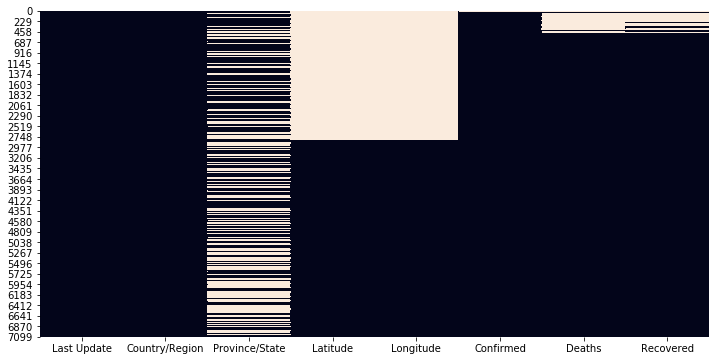

In [455]:
plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)

## Duplicates

In [456]:
# Example of duplicate.
df_aux = df[df['Last Update'].astype(str).str[:10] == '2020-03-01']
df_aux[df_aux['Country/Region']=='Mexico']

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2887,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0
3017,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0


We need to drop all the duplicates that the DataFrame has:

In [457]:
df = df.drop_duplicates()

In [458]:
# Check if ther are no more duplicates.
df_aux = df[df['Last Update'].astype(str).str[:10] == '2020-03-01']
df_aux[df_aux['Country/Region']=='Mexico']

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2887,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0


## Unnesesary zeros

In [459]:
df_copy = df.copy()

In [460]:
print(len(df[df['Country/Region'] == 'Mexico']['Country/Region']))
df[df['Country/Region'] == 'Mexico']

18


,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
81,2020-01-23,Mexico,NaN,NaN,NaN,NaN,NaN,NaN
2679,2020-02-28,Mexico,NaN,NaN,NaN,1.0,0.0,0.0
2766,2020-02-29,Mexico,NaN,NaN,NaN,4.0,0.0,0.0
2887,2020-03-01,Mexico,NaN,23.0000,-102.0000,5.0,0.0,0.0
3163,2020-03-03,Mexico,NaN,23.0000,-102.0000,5.0,0.0,1.0
3662,2020-03-06,Mexico,NaN,23.0000,-102.0000,6.0,0.0,1.0
4098,2020-03-08,Mexico,NaN,23.0000,-102.0000,7.0,0.0,1.0
4630,2020-03-10,Mexico,NaN,23.0000,-102.0000,7.0,0.0,4.0
4849,2020-03-11,Mexico,NaN,23.0000,-102.0000,8.0,0.0,4.0
5056,2020-03-12,Mexico,NaN,23.0000,-102.0000,12.0,0.0,4.0


In [461]:
df = df.dropna(axis=0,thresh=5)
print(len(df[df['Country/Region'] == 'Mexico']['Country/Region']))
df[df['Country/Region'] == 'Mexico']

17


,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2679,2020-02-28,Mexico,NaN,NaN,NaN,1.0,0.0,0.0
2766,2020-02-29,Mexico,NaN,NaN,NaN,4.0,0.0,0.0
2887,2020-03-01,Mexico,NaN,23.0000,-102.0000,5.0,0.0,0.0
3163,2020-03-03,Mexico,NaN,23.0000,-102.0000,5.0,0.0,1.0
3662,2020-03-06,Mexico,NaN,23.0000,-102.0000,6.0,0.0,1.0
4098,2020-03-08,Mexico,NaN,23.0000,-102.0000,7.0,0.0,1.0
4630,2020-03-10,Mexico,NaN,23.0000,-102.0000,7.0,0.0,4.0
4849,2020-03-11,Mexico,NaN,23.0000,-102.0000,8.0,0.0,4.0
5056,2020-03-12,Mexico,NaN,23.0000,-102.0000,12.0,0.0,4.0
5312,2020-03-11,Mexico,NaN,23.6345,-102.5528,12.0,0.0,4.0


In [462]:
# Changed a date that was wrong
df['Last Update'][5312]=dt.datetime(2020,3,13)

# 3.5 Classes

In [565]:
countries = list(df['Country/Region'].unique())
countries.sort()
countries_dict = dict(zip(countries, [None]*len(countries)))
countries_dfs = countries_dict.copy()
for key in countries_dfs:
    
    countries_dfs[key] = make_time_series(df,country=key)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [593]:
class Values:
    
    def __init__(self,series,confirmed=None,deaths=None,recovered=None,mortality_rate=None,
                 new_confirmed=None,new_deaths=None,new_recovered=None,new_confirmed_percetage=None,
                new_deaths_percentage=None,new_recovered_percentage=None):
        
        last_local_update_date = series.index.max()
        
        self.series = series
        self.confirmed = series.loc[last_local_update_date]['Confirmed']
        self.deaths = series.loc[last_local_update_date]['Deaths']
        self.recovered = series.loc[last_local_update_date]['Recovered']
        self.mortality_rate = series.loc[last_local_update_date]['Mortality Rate']
        self.new_confirmed = series.loc[last_local_update_date]['Dif Confirmed']
        self.new_deaths = series.loc[last_local_update_date]['Dif Deaths']
        self.new_recovered = series.loc[last_local_update_date]['Dif Recovered']
        self.new_confirmed_percetage = series.loc[last_local_update_date]['Dif Confirmed%']
        self.new_deaths_percentage = series.loc[last_local_update_date]['Dif Deaths%']
        self.new_recovered_percentage = series.loc[last_local_update_date]['Dif Recovered%']
    
    def to_dict(self):
        keys_list = ['Confirmed', 'Deaths', 'Recovered',
                     'Mortality Rate', 'Dif Confirmed', 'Dif Confirmed%', 'Dif Deaths',
                     'Dif Deaths%', 'Dif Recovered', 'Dif Recovered%']
        values_list = [self.confirmed,self.deaths,self.recovered,self.mortality_rate,
                       self.new_confirmed,self.new_deaths,self.new_recovered,self.new_confirmed_percetage,
                       self.new_deaths_percentage,self.new_recovered_percentage]
        return dict(zip(keys_list,values_list))
    
class Country:
    
    def __init__(self,name,time_series=None,first_infection_date=None,values=None):
        self.name = name
        self.time_series = countries_dfs[name]
        self.first_infection_date = self.time_series.index.min()
        self.values = Values(self.time_series)
        
    
    
        
    
    

In [636]:
Country('Mexico').time_series

,Latitude,Longitude,Confirmed,Deaths,Recovered,Mortality Rate,Dif Confirmed,Dif Confirmed%,Dif Deaths,Dif Deaths%,Dif Recovered,Dif Recovered%
Last Update,,,,,,,,,,,,
2020-02-28,0.0000,0.0000,1.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,0.0000,0.0000,4.0,0.0,0.0,0.000000,3.0,3.000000,0.0,NaN,0.0,NaN
2020-03-01,23.0000,-102.0000,5.0,0.0,0.0,0.000000,1.0,0.250000,0.0,NaN,0.0,NaN
2020-03-03,23.0000,-102.0000,5.0,0.0,1.0,0.000000,0.0,0.000000,0.0,NaN,1.0,inf
2020-03-06,23.0000,-102.0000,6.0,0.0,1.0,0.000000,1.0,0.200000,0.0,NaN,0.0,0.0
2020-03-08,23.0000,-102.0000,7.0,0.0,1.0,0.000000,1.0,0.166667,0.0,NaN,0.0,0.0
2020-03-10,23.0000,-102.0000,7.0,0.0,4.0,0.000000,0.0,0.000000,0.0,NaN,3.0,3.0
2020-03-11,23.0000,-102.0000,8.0,0.0,4.0,0.000000,1.0,0.142857,0.0,NaN,0.0,0.0
2020-03-12,23.0000,-102.0000,12.0,0.0,4.0,0.000000,4.0,0.500000,0.0,NaN,0.0,0.0


In [607]:
def get_df_per_country(column):
    
    d = countries_dict.copy()
    for country in d:
        vals = Country(country).values.to_dict()
        d[country] = vals[column]
    
    df = pd.DataFrame.from_dict(d, orient='index', columns=[column])
    df = df.sort_values(column,ascending=False)
    return df

In [635]:
get_df_per_country('Mortality Rate').head(10)

,Mortality Rate
Sudan,0.500000
Gabon,0.333333
Guyana,0.142857
Algeria,0.122222
Ukraine,0.103448
San Marino,0.097222
Indonesia,0.086721
Italy,0.085749
Guatemala,0.083333
Iraq,0.081731


In [410]:
primary_keys = ['name','time_series','first_infection_date', 'values']
values_keys = ['confirmed','deaths','recuperated','mortality_rate','new_confirmed','new_deaths', 'new_recuperated']
print(len(primary_keys))
print(len(values_keys))

d = dict(zip(primary_keys,[None]*len(primary_keys)))
d['values'] = dict(zip(values_keys,[None]*len(values_keys)))
d

4
7


{'name': None,
 'time_series': None,
 'first_infection_date': None,
 'values': {'confirmed': None,
  'deaths': None,
  'recuperated': None,
  'mortality_rate': None,
  'new_confirmed': None,
  'new_deaths': None,
  'new_recuperated': None}}

In [634]:
Chile = Country('Chile')
print(Chile.time_series['Dif Confirmed%'].mean())
print(Chile.values.new_confirmed_percetage)
Chile.time_series

1.1199908977828914
0.8235294117647058


,Latitude,Longitude,Confirmed,Deaths,Recovered,Mortality Rate,Dif Confirmed,Dif Confirmed%,Dif Deaths,Dif Deaths%,Dif Recovered,Dif Recovered%
Last Update,,,,,,,,,,,,
2020-03-03,-35.6751,-71.543,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,-35.6751,-71.543,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,NaN
2020-03-05,-35.6751,-71.543,4.0,0.0,0.0,0.0,3.0,3.000000,0.0,NaN,0.0,NaN
2020-03-08,-35.6751,-71.543,8.0,0.0,0.0,0.0,4.0,1.000000,0.0,NaN,0.0,NaN
2020-03-10,-35.6751,-71.543,13.0,0.0,0.0,0.0,5.0,0.625000,0.0,NaN,0.0,NaN
2020-03-11,-71.3502,-143.086,66.0,0.0,0.0,0.0,53.0,4.076923,0.0,NaN,0.0,NaN
2020-03-14,-71.3502,-143.086,135.0,0.0,0.0,0.0,69.0,1.045455,0.0,NaN,0.0,NaN
2020-03-16,-35.6751,-71.543,155.0,0.0,0.0,0.0,20.0,0.148148,0.0,NaN,0.0,NaN
2020-03-17,-35.6751,-71.543,201.0,0.0,0.0,0.0,46.0,0.296774,0.0,NaN,0.0,NaN


In [633]:
Brazil = Country('Brazil')
print(Brazil.time_series['Dif Confirmed%'].mean())
print(Brazil.values.new_confirmed_percetage)
Brazil.time_series

0.9714557141682276
0.27697262479871165


,Latitude,Longitude,Confirmed,Deaths,Recovered,Mortality Rate,Dif Confirmed,Dif Confirmed%,Dif Deaths,Dif Deaths%,Dif Recovered,Dif Recovered%
Last Update,,,,,,,,,,,,
2020-02-26,0.000,0.0000,1.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,-14.235,-51.9253,4.0,0.0,0.0,0.000000,3.0,3.000000,0.0,NaN,0.0,NaN
2020-03-04,-14.235,-51.9253,4.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN
2020-03-06,-14.235,-51.9253,13.0,0.0,0.0,0.000000,9.0,2.250000,0.0,NaN,0.0,NaN
2020-03-08,-14.235,-51.9253,20.0,0.0,0.0,0.000000,7.0,0.538462,0.0,NaN,0.0,NaN
2020-03-09,-14.235,-51.9253,25.0,0.0,0.0,0.000000,5.0,0.250000,0.0,NaN,0.0,NaN
2020-03-10,-14.235,-51.9253,31.0,0.0,0.0,0.000000,6.0,0.240000,0.0,NaN,0.0,NaN
2020-03-11,-28.470,-103.8506,189.0,0.0,0.0,0.000000,158.0,5.096774,0.0,NaN,0.0,NaN
2020-03-12,-14.235,-51.9253,52.0,0.0,0.0,0.000000,-137.0,-0.724868,0.0,NaN,0.0,NaN


# 4. Exploratory Data Analysis

First, we will make time series for every country and for our global data.

For that, we define the next function:

In [401]:
def make_time_series(df,country='Global'):
    """
    Function to make a time series of the Confirmed/Deaths/Recovered per country
    or globaly.
    
    Input:
    - df: DataFrame, not null, must be the df we have been using
    - country: String, default 'Global', country which we want to analyze
    
    Output:
    - DataFrame with the time Series
    """
    
    if country=='Global':
        return df.groupby('Last Update').sum()
    else:
        try:
            return df.groupby(by=['Country/Region','Last Update']).sum().loc[country]
        except:
            print('Country is not valid, please try again.')

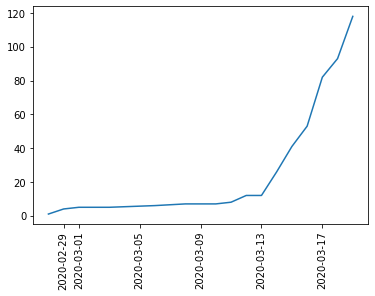

In [404]:
plt.plot(countries_dict['Mexico']['Confirmed'].dropna())
plt.xticks(rotation='vertical')
plt.show()

In [620]:
# ts for Time Series
global_ts = make_time_series(df)

In [621]:
global_ts

,Latitude,Longitude,Confirmed,Deaths,Recovered,Mortality Rate,Dif Confirmed,Dif Confirmed%,Dif Deaths,Dif Deaths%,Dif Recovered,Dif Recovered%
Last Update,,,,,,,,,,,,
2020-01-22,0.000000,0.000000,444.0,17.0,28.0,0.038288,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.000000,0.000000,477.0,18.0,30.0,0.037736,33.0,0.074324,1.0,0.058824,2.0,0.071429
2020-01-24,0.000000,0.000000,707.0,26.0,36.0,0.036775,230.0,0.482180,8.0,0.444444,6.0,0.200000
2020-01-25,0.000000,0.000000,1010.0,42.0,39.0,0.041584,303.0,0.428571,16.0,0.615385,3.0,0.083333
2020-01-26,0.000000,0.000000,1525.0,56.0,49.0,0.036721,515.0,0.509901,14.0,0.333333,10.0,0.256410
2020-01-27,0.000000,0.000000,2154.0,82.0,58.0,0.038069,629.0,0.412459,26.0,0.464286,9.0,0.183673
2020-01-28,0.000000,0.000000,4595.0,131.0,101.0,0.028509,2441.0,1.133240,49.0,0.597561,43.0,0.741379
2020-01-29,0.000000,0.000000,5547.0,133.0,120.0,0.023977,952.0,0.207182,2.0,0.015267,19.0,0.188119
2020-01-30,0.000000,0.000000,7778.0,171.0,137.0,0.021985,2231.0,0.402199,38.0,0.285714,17.0,0.141667


# Functions

In [476]:
df.columns

Index(['Last Update', 'Country/Region', 'Province/State', 'Latitude',
       'Longitude', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [637]:
def add_factor(df,column):
        
        name_str = 'Factor '+column
        factors = []
        for i in range(len(df[column])):
            if i==0:
                factors.append(None)
            else:
                factors.append(df[column][i]/df[column][i-1])
        
        df[name_str] = factors
        return df

1.2594086021505375

In [694]:
factor_mexico =np.quantile(Mexico.time_series['Factor Confirmed'].dropna(),0.5)
contador=1
for i in range(22):
    print('Día {}: '.format(i),contador*factor_mexico**i)

Día 0:  1.0
Día 1:  1.2594086021505375
Día 2:  1.5861100271707709
Día 3:  1.9975606121760916
Día 4:  2.5157450182916636
Día 5:  3.1683509168538824
Día 6:  3.990248399317322
Día 7:  5.025353158817648
Día 8:  6.3289729970593225
Día 9:  7.970763035274979
Día 10:  10.038447532328837
Día 11:  12.642507174451774
Día 12:  15.922082288254451
Día 13:  20.05240739797637
Día 14:  25.254174370838516
Día 15:  31.805324442843666
Día 16:  40.055899197506065
Día 17:  50.44674401621395
Día 18:  63.533063364506006
Día 19:  80.01408652223404
Día 20:  100.77042885931893
Día 21:  126.91114494782504


In [677]:
factor_mexico

1.4772350215939154

In [676]:
Mexico.time_series

,Latitude,Longitude,Confirmed,Deaths,Recovered,Mortality Rate,Dif Confirmed,Dif Confirmed%,Dif Deaths,Dif Deaths%,Dif Recovered,Dif Recovered%,Factor Confirmed,Factor Deaths
Last Update,,,,,,,,,,,,,,
2020-02-28,0.0000,0.0000,1.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,0.0000,0.0000,4.0,0.0,0.0,0.000000,3.0,3.000000,0.0,NaN,0.0,NaN,4.000000,NaN
2020-03-01,23.0000,-102.0000,5.0,0.0,0.0,0.000000,1.0,0.250000,0.0,NaN,0.0,NaN,1.250000,NaN
2020-03-03,23.0000,-102.0000,5.0,0.0,1.0,0.000000,0.0,0.000000,0.0,NaN,1.0,inf,1.000000,NaN
2020-03-06,23.0000,-102.0000,6.0,0.0,1.0,0.000000,1.0,0.200000,0.0,NaN,0.0,0.0,1.200000,NaN
2020-03-08,23.0000,-102.0000,7.0,0.0,1.0,0.000000,1.0,0.166667,0.0,NaN,0.0,0.0,1.166667,NaN
2020-03-10,23.0000,-102.0000,7.0,0.0,4.0,0.000000,0.0,0.000000,0.0,NaN,3.0,3.0,1.000000,NaN
2020-03-11,23.0000,-102.0000,8.0,0.0,4.0,0.000000,1.0,0.142857,0.0,NaN,0.0,0.0,1.142857,NaN
2020-03-12,23.0000,-102.0000,12.0,0.0,4.0,0.000000,4.0,0.500000,0.0,NaN,0.0,0.0,1.500000,NaN


In [690]:
Mexico = Country('Mexico')
Mexico.time_series = add_factor(Mexico.time_series,'Confirmed')
dias_mexico = (Mexico.time_series.index.to_list()[-1]-Mexico.time_series.index.to_list()[0]).days

dias_por_estimar = 30
keys = [i for i in range(dias_por_estimar)]
est_mexico = []
for i in range(dias_por_estimar):

    est_mexico.append(Mexico.values.confirmed * (factor_mexico)**i)

estimaciones = dict(zip(keys,est_mexico))

In [669]:
Country('Italy').values.confirmed

47021.0

In [693]:
last_update_date + dt.timedelta(days=25)

Timestamp('2020-04-14 00:00:00')

In [696]:
Mexico.time_series.to_csv('mexico.csv')

In [692]:
estimaciones

{0: 164.0,
 1: 206.54301075268816,
 2: 260.12204445600645,
 3: 327.59994039687905,
 4: 412.5821829998328,
 5: 519.6095503640367,
 6: 654.4007374880408,
 7: 824.1579180460942,
 8: 1037.9515715177288,
 9: 1307.2051377850967,
 10: 1646.3053953019291,
 11: 2073.371176610091,
 12: 2611.22149527373,
 13: 3288.5948132681247,
 14: 4141.684596817517,
 15: 5216.0732086263615,
 16: 6569.167468390995,
 17: 8273.266018659087,
 18: 10419.422391778986,
 19: 13122.310189646381,
 20: 16526.350332928305,
 21: 20813.427771443305,
 22: 26212.60997559459,
 23: 33012.38648808082,
 24: 41576.08352060716,
 25: 52361.27722958185,
 26: 65944.24296252445,
 27: 83050.74684930834,
 28: 104594.8249970456,
 29: 131727.62234170927}

In [615]:
def make_time_series(df,country='Global'):
    """
    Function to make a time series of the Confirmed/Deaths/Recovered per country
    or globaly.
    
    Input:
    - df: DataFrame, not null, must be the df we have been using
    - country: String, default 'Global', country which we want to analyze
    
    Output:
    - DataFrame with the time Series
    """
    #df = df['Last Update', 'Country/Region', 'Province/State','Confirmed','Deaths','Recovered']
    
    if country=='Global':
        out = df.groupby('Last Update').sum()
        out['Mortality Rate'] = out['Deaths']/out['Confirmed']
        out['Dif Confirmed'] = out['Confirmed'].diff()
        out['Dif Confirmed%'] = diff_percentage(out['Confirmed'])
        out['Dif Deaths'] = out['Deaths'].diff()
        out['Dif Deaths%'] = diff_percentage(out['Deaths'])
        out['Dif Recovered'] = out['Recovered'].diff()
        out['Dif Recovered%'] = diff_percentage(out['Recovered'])
        out['']
        return out
    else:
        try:
            out = df.groupby(by=['Country/Region','Last Update']).sum().loc[country]
            out['Mortality Rate'] = out['Deaths']/out['Confirmed']
            out['Dif Confirmed'] = out['Confirmed'].diff()
            out['Dif Confirmed%'] = diff_percentage(out['Confirmed'])
            out['Dif Deaths'] = out['Deaths'].diff()
            out['Dif Deaths%'] = diff_percentage(out['Deaths'])
            out['Dif Recovered'] = out['Recovered'].diff()
            out['Dif Recovered%'] = diff_percentage(out['Recovered'])
            return out
        except:
            print('Country is not valid, please try again.')
            
def diff_percentage(series):
    dif = [np.nan]
    for i in range(1,len(series)):
        dif.append(series[i]/series[i-1]-1)
    return(dif)

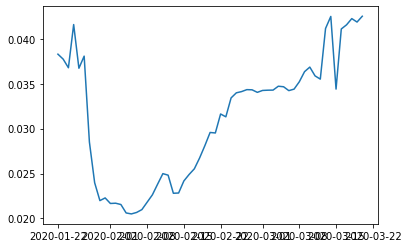

In [487]:
plt.plot(make_time_series(df,country='Global')['Mortality Rate'])